- 자연어 처리에 필요한 라이브러리 :텐서플로우, 케라스, 젠심, 사이킷런

  - **keras**: 텐서플로우의 추상화된 머신/딥러닝 라이브러리

- 텍스트 전처리 :  NLTK, KoNLPY(한국어 자연어 처리 파이썬 라이브러리)

# 자연어 처리
1. 전처리 
- 토큰화(단어, 문자, 문장, 문단 등 처리 단위 별)
- 코사인 유사도를 이용 -> 두 문장, 두 문단, 두 단어 사이의 유사도(토큰 단위가 다양하다)
2. 데이터 정제(정규화)
- 동의어 처리(한국, 대한민국, 코리아, korea, ...)
- 다의어 처리(타는 배, 먹는 배, 배수 배, 신체 배, ...)
  - 문맥의 의미를 고려하여 단어를 이해하도록 모델 만들기
- 어간 추출(stemming)
- qnfdyddj(stopwords)제거
- 정규표현식
- 인코딩('나는 오늘 회사에 출근했습니다' 품사별로 분류)  
https://konlpy.org/

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
pip install gensim

In [4]:
pip install konlpy


  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1


In [2]:
#자연어 처리에 필요한 라이브러리 :텐서플로우, 케라스, 젠심, 사이킷런

import tensorflow as tf
import keras
import gensim
import sklearn

C:\Users\LG\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
tf.__version__

'2.4.1'

In [4]:
#텍스트 전처리 :  NLTK, KoNLPY(한국어 자연어 처리 파이썬 라이브러리)
import nltk #아나콘다에는 설치되어있음

nltk.__version__ 

'3.5'

In [3]:
nltk.download() #전부 다운로드

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
#konlpy를 사용하려면 java(1.7이상)와 JPype 사전 설치 필요함
import konlpy

In [6]:
from konlpy.tag import Okt

In [7]:
#자바 패스 설정 필요 : (에러메세지)
#No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.
okt=Okt()


### Java 다운로드
https://www.oracle.com/technetwork/java/javase/downloads/index.html  

시스템 고급설정에서 사용자 경로 추가

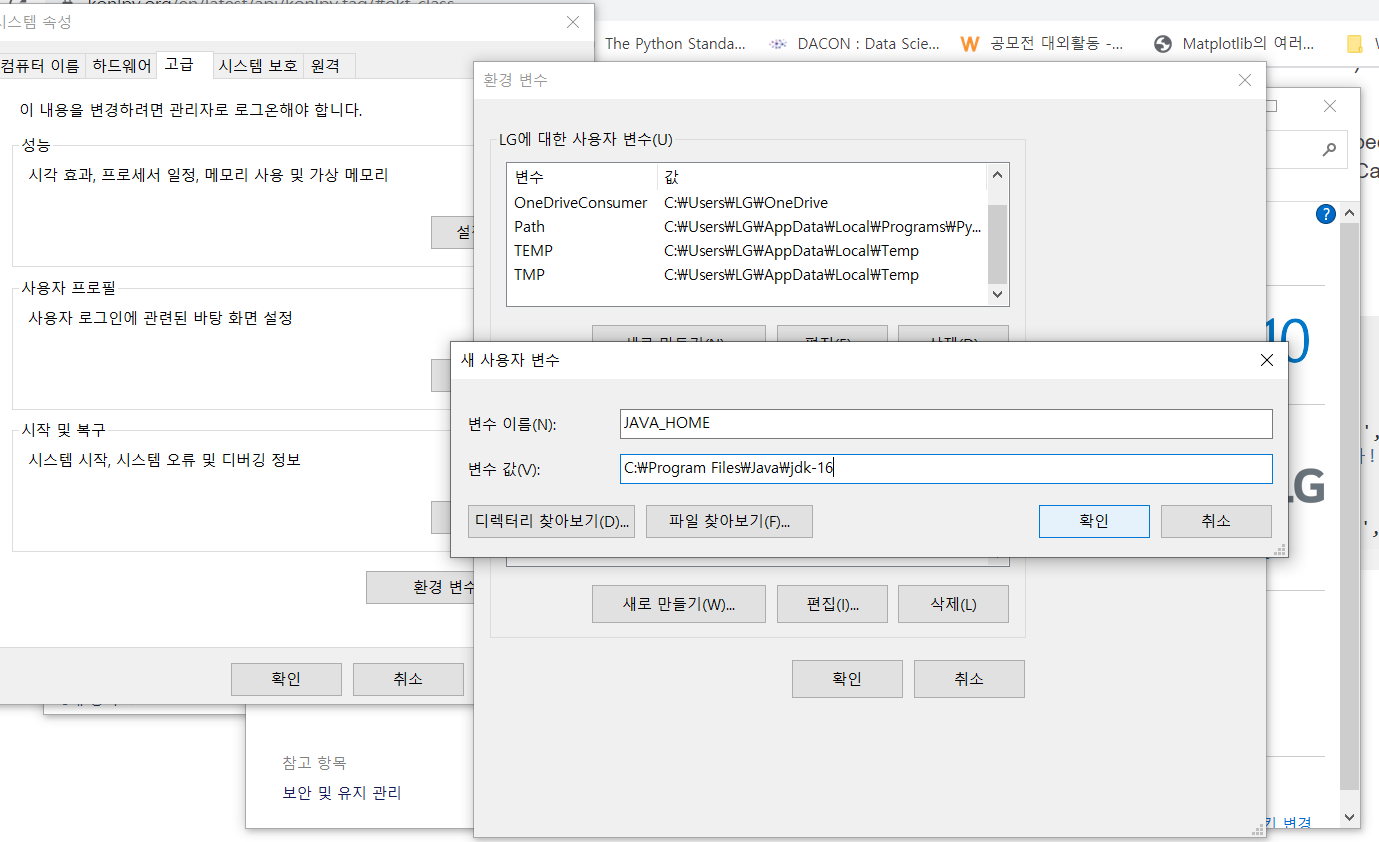

### JPype 다운로드
- JPype: Java + Python 연결   
https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype  

1. 파이썬 버전확인 후 :3.8.3 은 cp38 다운

In [1]:
#파이썬 버전확인

import sys

sys.version

'3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]'

- 다운받은 파일 경로 설치

In [4]:
pip install c:\users\lg\downloads\jpype1-1.2.0-cp38-cp38-win_amd64.whl

Processing c:\users\lg\downloads\jpype1-1.2.0-cp38-cp38-win_amd64.whl
  Attempting uninstall: jpype1
    Found existing installation: JPype1 1.2.1
    Uninstalling JPype1-1.2.1:
      Successfully uninstalled JPype1-1.2.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
from konlpy.tag import Okt
okt = Okt()

print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']


## 한시간동안 설치했는데 구글colab에는 다 있음
### 설치 경로 알아보기였다. 
- 구글 코랩으로 진행

In [7]:
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))
print(okt.pos(u'이것도 되나욬ㅋㅋ'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]


In [10]:
from nltk.tokenize import word_tokenize  
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
#구두점(.,) 구분
#don't를 do/not 부분으로 띄어쓰기함
#가장 일반적

from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
#구두점(.,) 구분
#' 구분

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [9]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

#구두점(.,) 제거
#'는 합친 상태로 하나의 의미로 본다

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
